The following cells create the data sets $P$ and $Q$ from the first lecture. Here $P$ consists of 50 points sampled with noise from the unit circle, while $Q$ exhibits structure at two scales: at large scales data is sampled from $S^1$ while at small scales we see clusters around smaller circles.

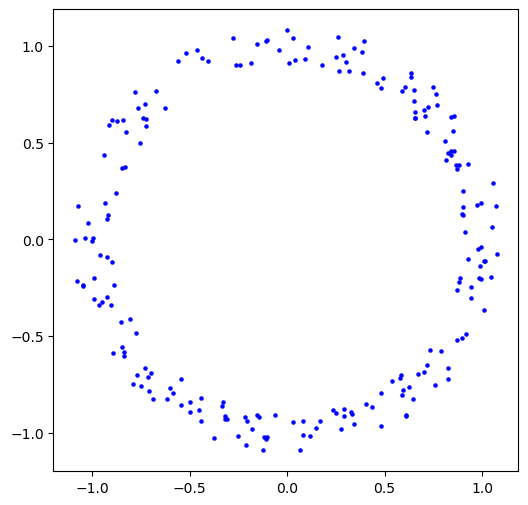

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser

## data set P: points in R^2 sampled from S^1 with noise

# number of points
num_points = 210

# angles sample uniformly between 0 and 2*pi
angles = np.random.uniform(0, 2*np.pi, num_points)

# noisy radii sampled uniformly between 0.9 and 1.1
radii = np.random.uniform(0.9, 1.1, num_points)

# polar to Cartesian conversion
x = radii * np.cos(angles)
y = radii * np.sin(angles)

# plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='blue', s=5)
plt.show()

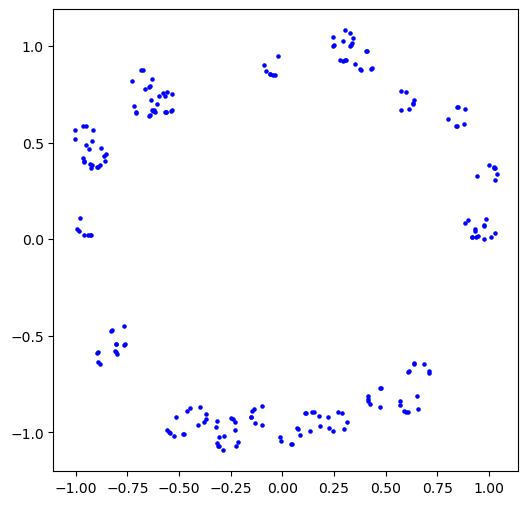

In [39]:
## data set Q: behavior at two different scales

# number of reference points
num_refpoints = 30

# angles sample uniformly between 0 and 2*pi
angles = np.random.uniform(0, 2*np.pi, num_refpoints)

# noisy radii sampled uniformly between 0.9 and 1.1
radii = np.random.uniform(0.9, 1.1, num_refpoints)

# polar to Cartesian conversion
x = radii * np.cos(angles)
y = radii * np.sin(angles)

plt.figure(figsize=(6, 6))

# number of points around each reference point
num_points = 7

# radius around reference points
small_radius = 0.05

# generate points sampled from a small_radus circle centered at each reference point
all_x_small = []
all_y_small = []

for i in range(num_refpoints):
    ref_x, ref_y = x[i], y[i]  # reference point
    angles_small = np.random.uniform(0, 2*np.pi, num_points) 
    x_small = ref_x + small_radius * np.cos(angles_small)
    y_small = ref_y + small_radius * np.sin(angles_small)
    plt.scatter(x_small, y_small, color='blue', s=5)
    all_x_small.append(x_small)
    all_y_small.append(y_small)

all_x_small = np.array(all_x_small).flatten()
all_y_small = np.array(all_y_small).flatten()

Now we can use [Ripser](https://ripser.scikit-tda.org/) and [Persim](https://persim.scikit-tda.org/) to plot persistence diagrams for $\mathrm{PH}_*(P;\mathbb{F}_2)$ and $\mathrm{PH}_*(Q;\mathbb{F}_2)$. We choose to only display information for $*=0,1$.

Barcode visualizations are not implemented in this ecosystem, but maybe you can fix that! See [this PR](https://github.com/scikit-tda/persim/pull/24).

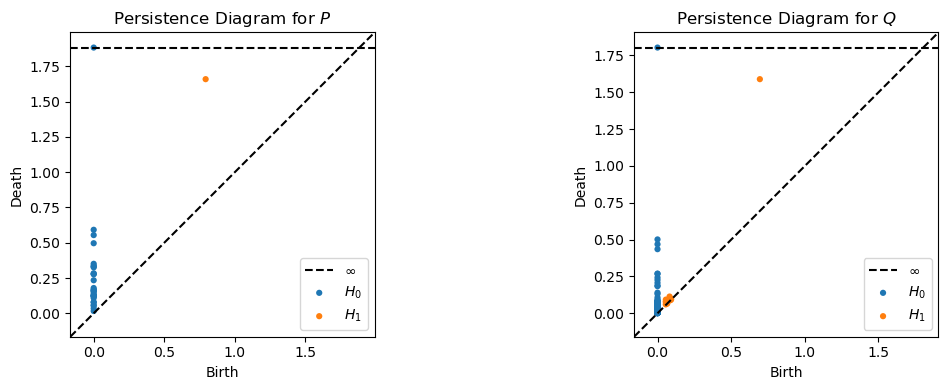

In [40]:
## Barcode and persistence diagrams for P

from ripser import ripser
from persim import plot_diagrams

dgmsP = ripser(np.column_stack((x, y)), maxdim=1)['dgms']
dgmsQ = ripser(np.column_stack((all_x_small,all_y_small)), maxdim=1)['dgms']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_diagrams(dgmsP)
plt.title('Persistence Diagram for $P$')
plt.xlabel('Birth')
plt.ylabel('Death')

plt.subplot(1, 2, 2)
plot_diagrams(dgmsQ)
plt.title('Persistence Diagram for $Q$')
plt.xlabel('Birth')
plt.ylabel('Death')

plt.tight_layout()
plt.show()